In a previous [post]() I briefly described the use of the xarray module to easily manipulate medium sized datasets. The data in question happened to be geophysical, 4-daily mapped *remote sensing reflectance uncertainty*. Visualizing these data can be cumbersome, requiring some significant and error-prone coding, resulting in a lot of back-and-forth until a useful but also presentable format is achieved. 


In the present post, I will illustrate the use of a [python](https://www.python.org/) library, [GeoViews](http://geo.holoviews.org/), to easily manipulate such data to quickly create compelling visualizations with very few lines of code.

As mentioned in [part I]() of this blog series, GeoViews sits on top of [HoloViews](http://holoviews.org/), a library where the user is directed to annotate his or her data, rather than writing plotting code. Holoviews then takes the annotated data to render it with minimum fuss. 

>A quick note on the data: the data I  use here in this post is from my own work on remote sensing uncertainty, and not currently publicly available.
>However, this data has the same format as *SMI* (mapped) data that can be readily downloaded from the Ocean Color Processing Group's  [level-3 browser](https://oceancolor.gsfc.nasa.gov/cgi/l3). The methodology laid out in this post should therefore be directly applicable to any SMI data you care to download.

So without further ado, let's get to it!

---


Let's begin first with the necessary imports.

In [1]:
import holoviews as hv
import geoviews as gv
from geoviews import feature as gf
from cartopy import crs
import numpy as np
import xarray as xr
from matplotlib import rcParams
import os

Jupyter notebook might restrict the size of embedded figures. I don't like that so to change that for some layout freedom:

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

Finally, I would like some uniformity in text layout across this notebook so:

In [3]:
rcParams['axes.formatter.limits']=[-2,3] # switch to engineering unit format beyond a certain range of numbers
rcParams['font.size'] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['legend.fontsize'] = 16

Holoviews can use [matplotlib](http://matplotlib.org/) and/or [bokeh](http://bokeh.pydata.org/en/latest/) facilities, a description of which is beyond this post. The next line enables their use in this notebook, and prints a status message.

In [4]:
hv.notebook_extension('matplotlib')

In [6]:
%opts Image {+framewise} [colorbar=True, ] style(cmap='viridis') Overlay [fig_size=800]

All is well, now on to defining some i/o paths and loading the data produced in [part I]().

In [7]:
dataDir = '/accounts/ekarakoy/disk02/UNCERTAINTIES/Monte-Carlo/DATA/AncillaryMC/'
expDir = 'Lt'
origName = 'S20031932003196.L3m_4D_SU50.nc'
finpath = os.path.join(dataDir,expDir,origName.split('.nc')[0] + '_xarray.nc')

In the last post I merged Rrs arrays creating in addition to the already existing lat/lon dimensions a third, band, dimension. Below, I load this new dataset and identify the relevant key dimensions (kdims) and value dimensions (vdims), which are inputs description semantics that HoloViews (and GeoViews) use to compose graphical output.

In [10]:
kdims = ['lat', 'lon', 'bands']
vdims = ['rrs_uncertainty']
xr_dataset = gv.Dataset(xr.open_dataset(finpath), crs = crs.PlateCarree(),
                       kdims=kdims, vdims=vdims)

In [16]:
xr_dataset

b':Dataset   [lat,lon,bands]   (rrs_uncertainty)'

In [12]:
rrs_unc = xr_dataset.to(gv.Image,['lon','lat'])* gf.land(style=dict(facecolor='black'))

In [17]:
rrs_unc2 = xr_dataset.redim(rrs_uncertainty=dict(range=(7.5e-5,4e-4))).to(gv.Image,['lon','lat'],
                                                                         ['rrs_uncertainty'])* gf.land(style=dict(facecolor='black'))

b':HoloMap   [bands]\n   :Overlay\n      .Image.I :Image   [lon,lat]   (rrs_uncertainty)\n      .Land.I  :Feature   [Longitude,Latitude]'
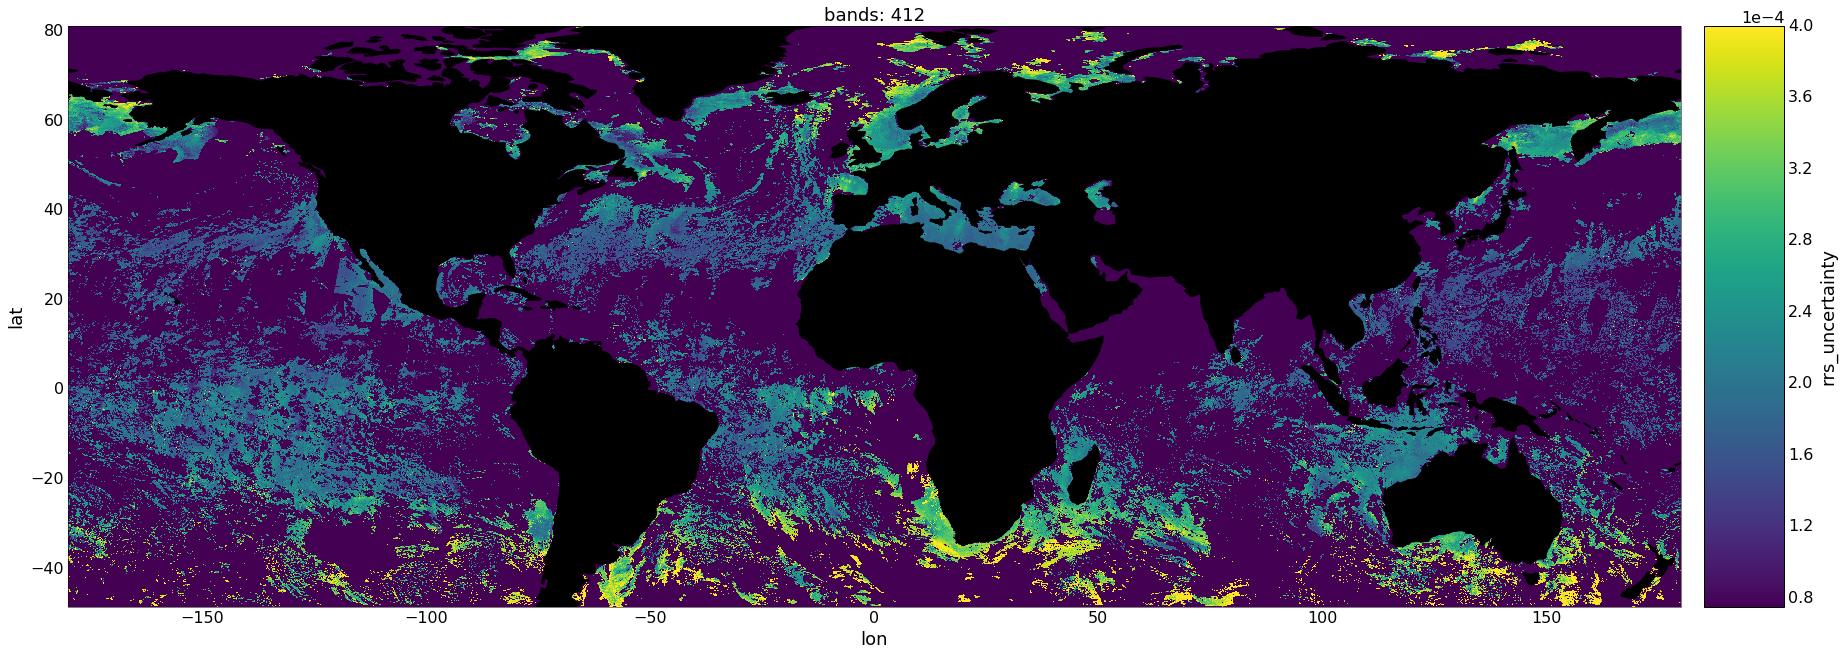
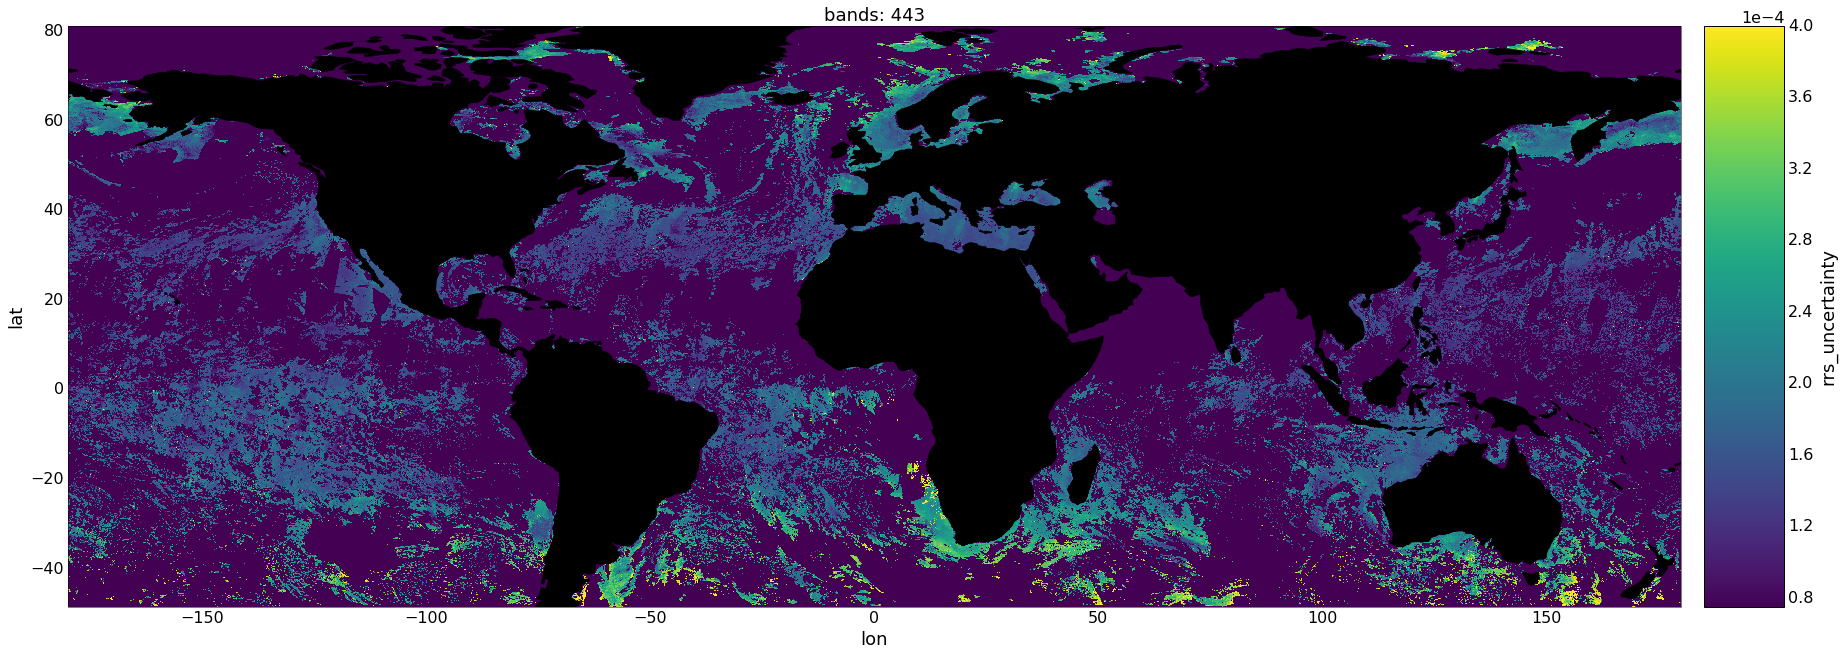
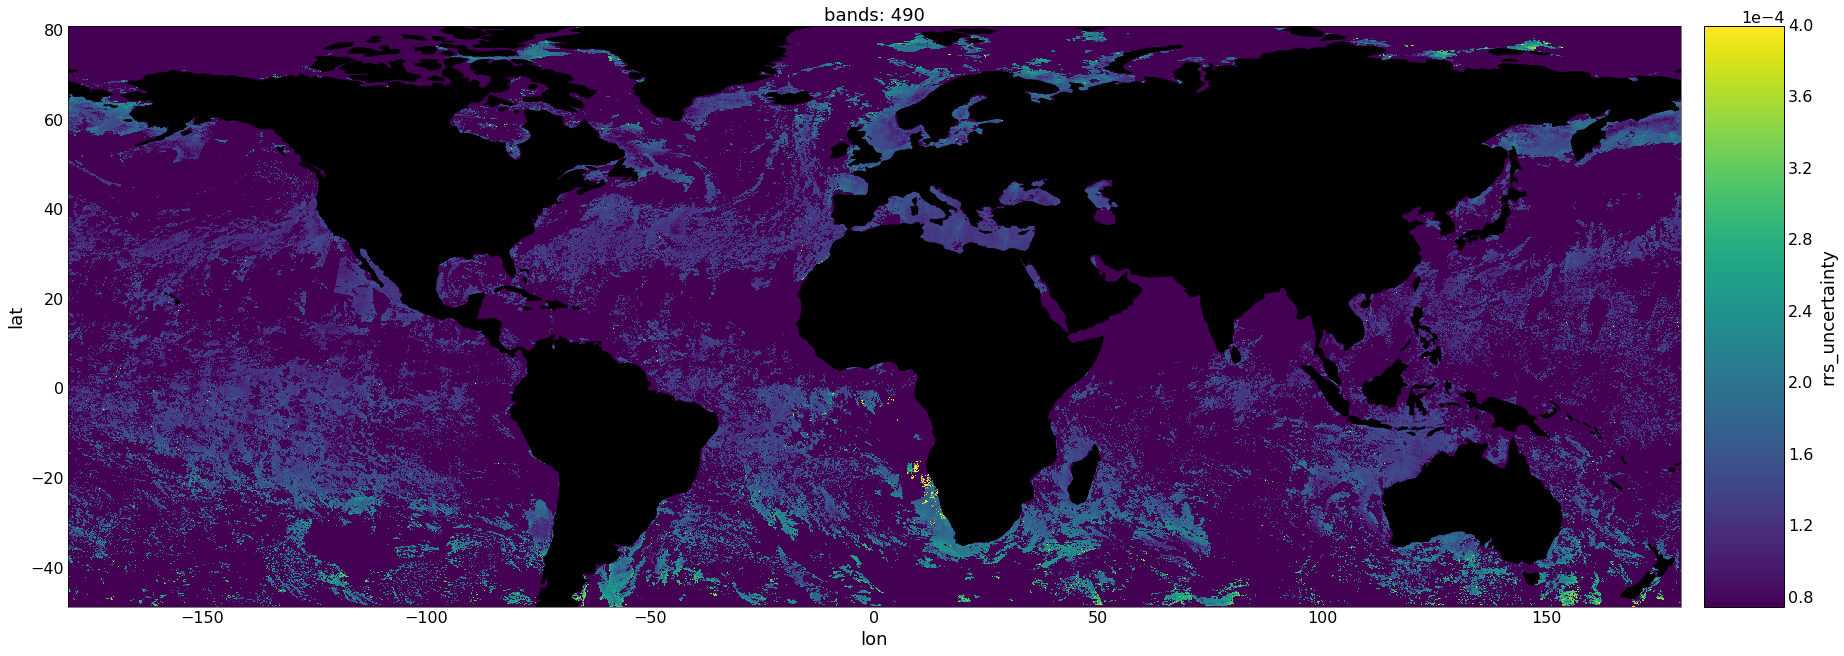
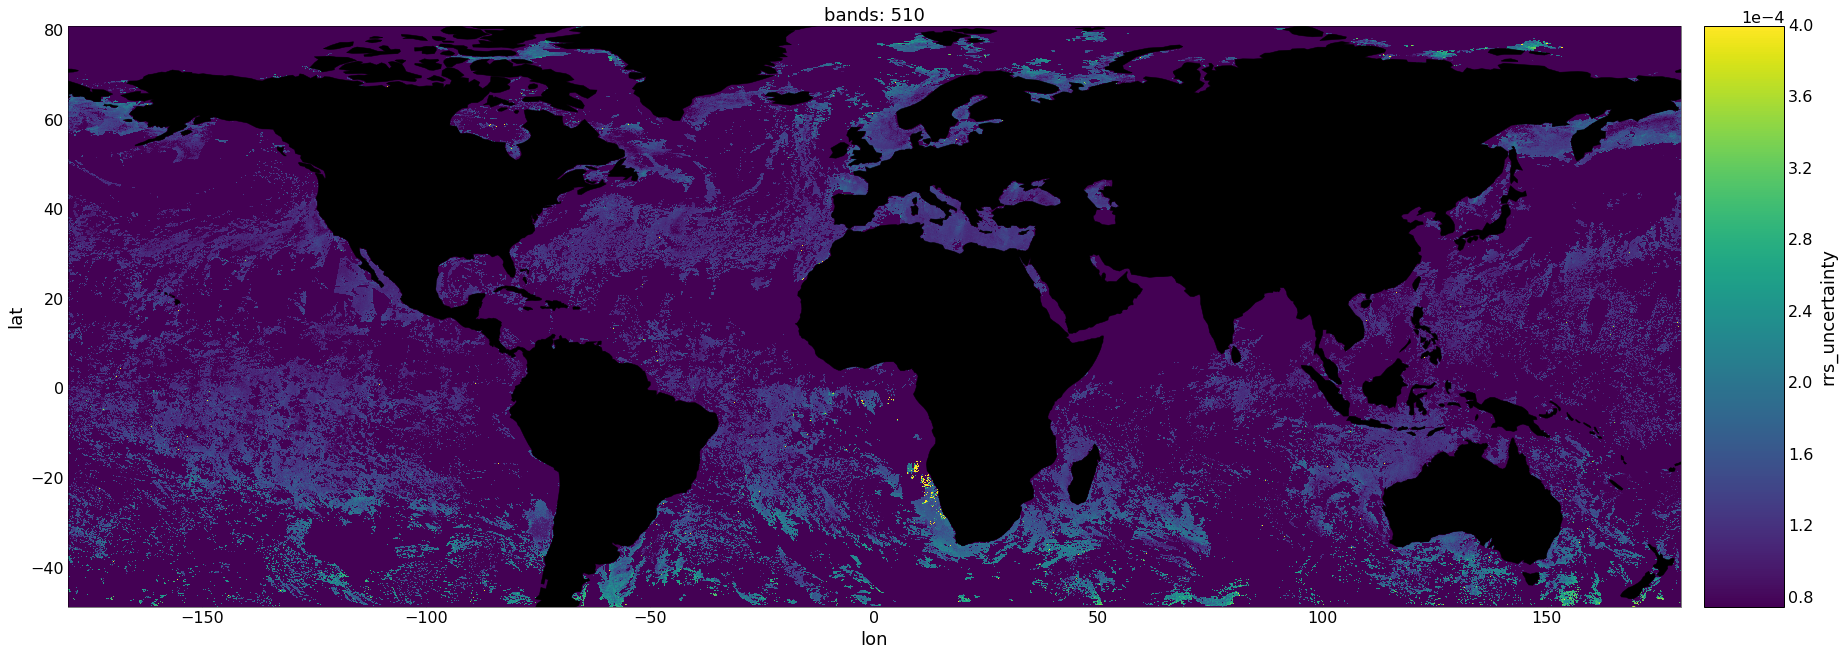
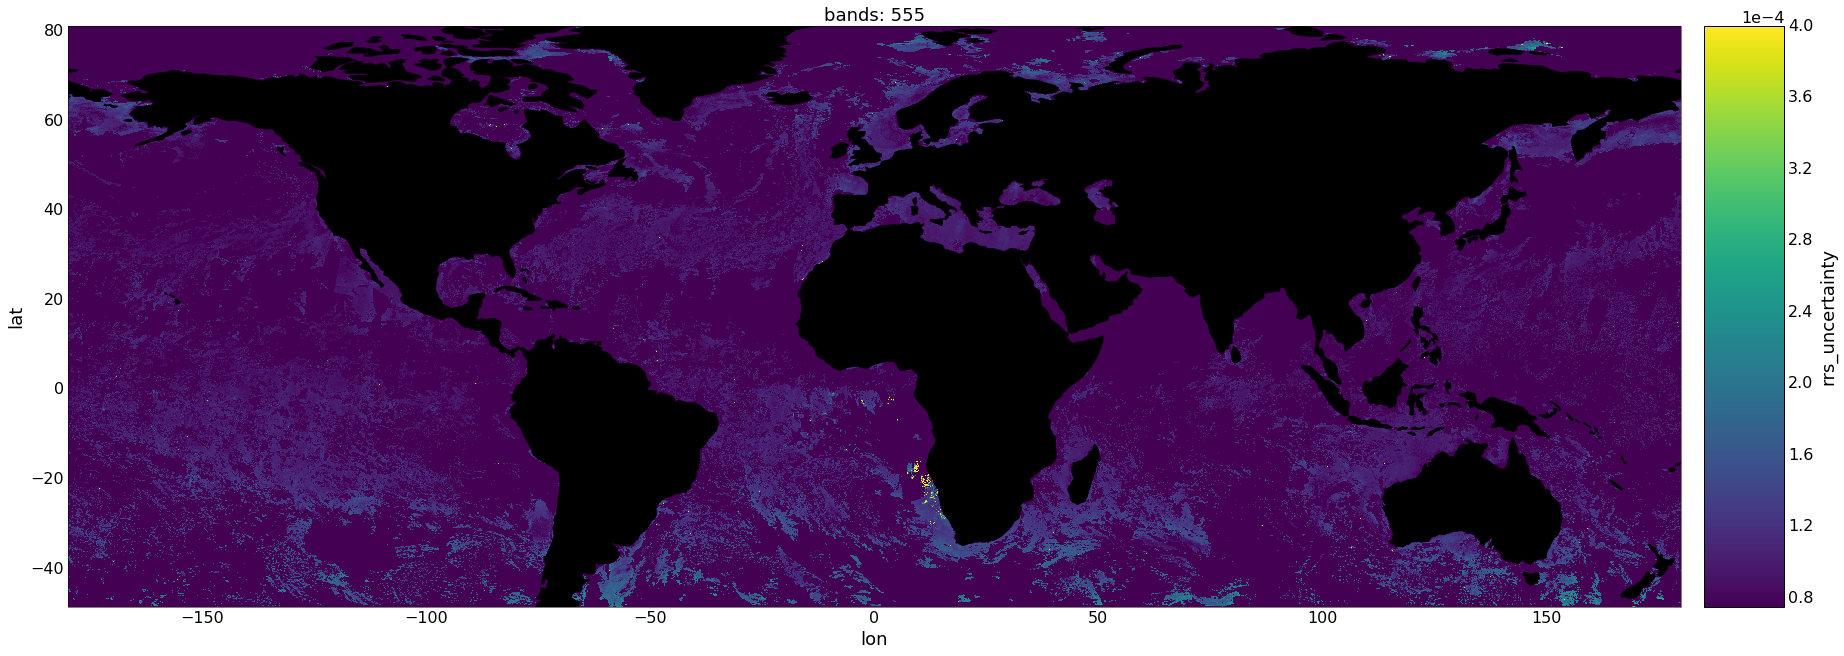
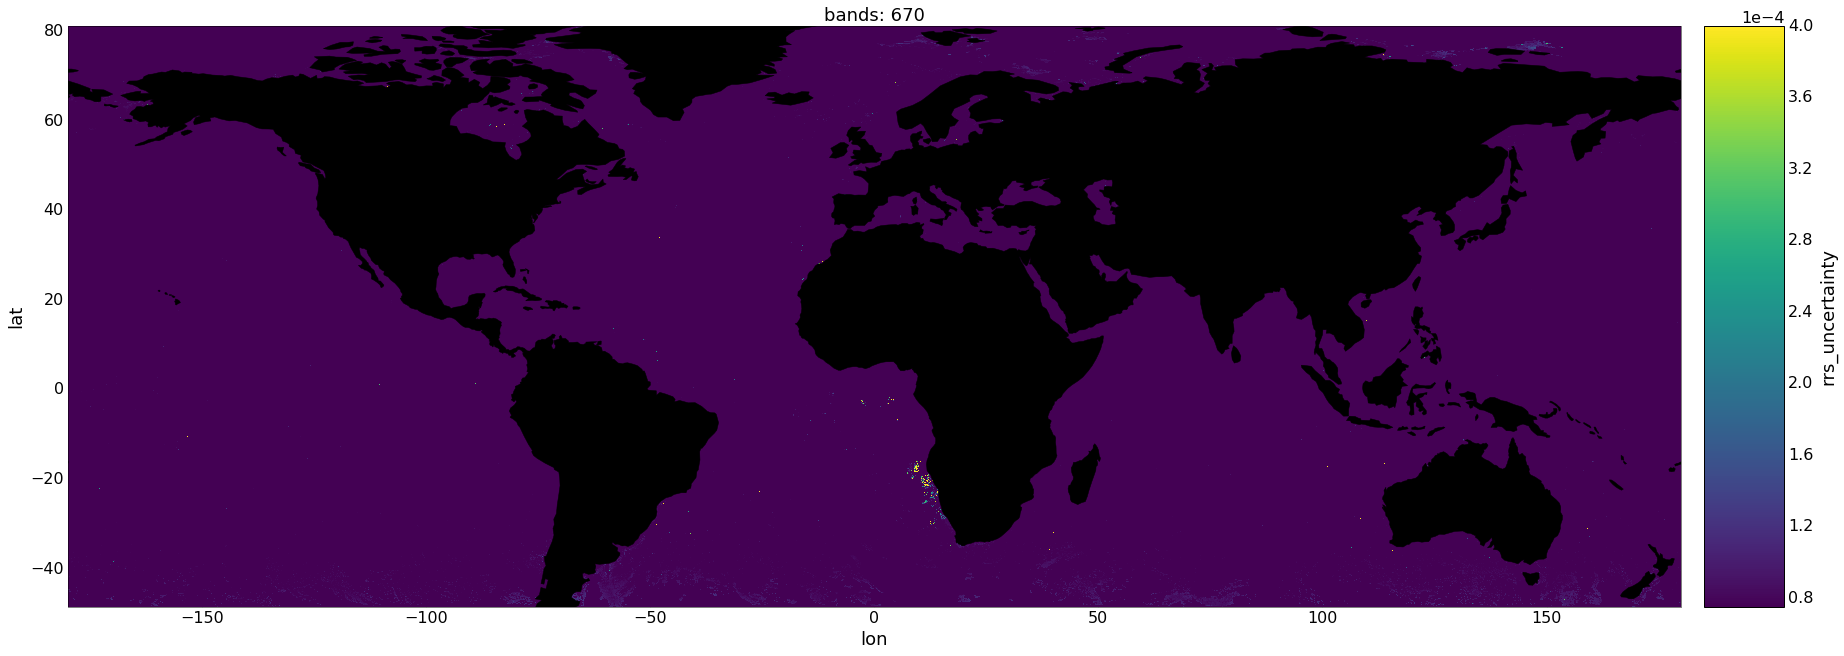

In [19]:
rrs_unc2